<a href="https://colab.research.google.com/github/vivekd16/Deep-Learning/blob/main/02_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#neural network classification

In [2]:
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [5]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


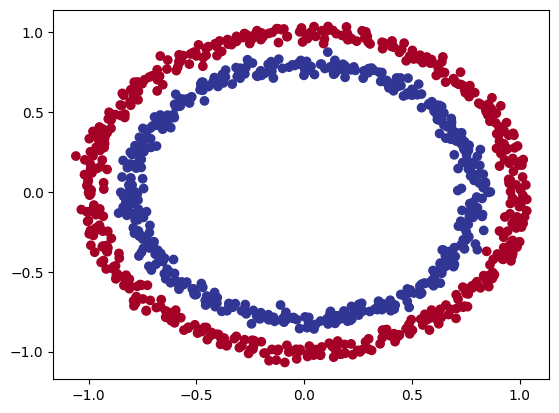

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,
            cmap=plt.cm.RdYlBu)

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X[0],y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

In [9]:
import torch

In [10]:
type(X)

numpy.ndarray

In [11]:
X=torch.from_numpy(X).type(torch.float)

In [12]:
y=torch.from_numpy(y).type(torch.float)

In [13]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
len(X_train),len(X_test)

(800, 200)

In [17]:
import torch
from torch import nn
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
class circlemodelv0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
model_0=circlemodelv0().to(device)
model_0

circlemodelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0=nn.Sequential(nn.Linear(in_features=2,out_features=5,bias=True),nn.Linear(in_features=5,out_features=1,bias=True)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1047,  0.6790],
                      [ 0.4536,  0.5965],
                      [ 0.6027, -0.1000],
                      [-0.6258,  0.2217],
                      [-0.1427, -0.2741]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2498, -0.5633, -0.3364, -0.2525,  0.4611], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4171, -0.3304, -0.1196,  0.0432,  0.3025]], device='cuda:0')),
             ('1.bias', tensor([-0.1950], device='cuda:0'))])

In [21]:
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
[len(untrained_preds),untrained_preds.shape,len(X_test),X_test.shape,untrained_preds[:10],y_test[:10]]

[200,
 torch.Size([200, 1]),
 200,
 torch.Size([200, 2]),
 tensor([[0.3742],
         [0.2841],
         [0.4310],
         [0.3589],
         [0.1457],
         [0.0929],
         [0.0650],
         [0.0195],
         [0.4429],
         [0.2749]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])]

In [22]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [23]:
def accuracy_fn(y_true,y_preds):
  correct=torch.eq(y_true,y_preds).sum().item()
  acc=(correct/len(y_preds))*100
  return acc

In [24]:
device

'cuda'

In [25]:
!nvidia-smi

Sun Feb 23 21:13:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.47                 Driver Version: 572.47         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0             15W /   80W |     123MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [26]:
#training loop

In [27]:
torch.cuda.manual_seed=42
epochs=1000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_preds=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_preds=test_preds)
  if epoch%10==0:
    print(f"epoch:{epoch} | loss:{loss:.5f},acc:{acc:.2f}| test_loss:{test_loss:.5f},test_acc:{test_acc:.2f}")

epoch:0 | loss:0.70545,acc:50.00| test_loss:0.70183,test_acc:51.00
epoch:10 | loss:0.69818,acc:55.88| test_loss:0.69658,test_acc:54.50
epoch:20 | loss:0.69558,acc:51.75| test_loss:0.69499,test_acc:56.50
epoch:30 | loss:0.69453,acc:50.25| test_loss:0.69452,test_acc:55.00
epoch:40 | loss:0.69403,acc:49.50| test_loss:0.69439,test_acc:54.00
epoch:50 | loss:0.69375,acc:49.88| test_loss:0.69438,test_acc:53.50
epoch:60 | loss:0.69357,acc:49.62| test_loss:0.69439,test_acc:52.00
epoch:70 | loss:0.69344,acc:49.50| test_loss:0.69441,test_acc:51.50
epoch:80 | loss:0.69334,acc:50.25| test_loss:0.69444,test_acc:50.00
epoch:90 | loss:0.69327,acc:50.38| test_loss:0.69446,test_acc:51.50
epoch:100 | loss:0.69321,acc:50.38| test_loss:0.69448,test_acc:50.00
epoch:110 | loss:0.69316,acc:50.12| test_loss:0.69450,test_acc:49.50
epoch:120 | loss:0.69312,acc:50.38| test_loss:0.69452,test_acc:48.50
epoch:130 | loss:0.69309,acc:50.38| test_loss:0.69454,test_acc:48.00
epoch:140 | loss:0.69307,acc:50.50| test_loss

In [30]:
from urllib import request
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
  from helper_functions import plot_predictions,plot_decision_boundary

downloading helper_functions.py


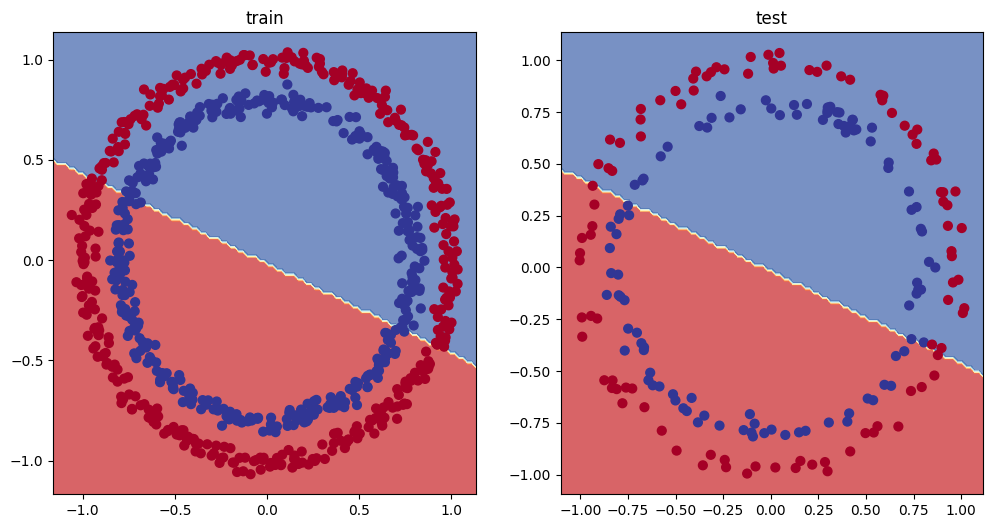

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

In [40]:
class circlemodelv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
    def forward(self,x):
        z=self.layer_1(x)
        z=self.layer_2(z)
        z=self.layer_3(z)
        return z
model_1=circlemodelv1().to(device)
model_1


circlemodelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),lr=0.01)

In [45]:
torch.manual_seed(42)
epochs=1000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_logits=model_1(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_preds=y_preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_preds=test_preds)
    if epoch%100==0:
        print(f"epoch:{epoch} | loss:{loss:.5f},acc:{acc:.2f}| test_loss:{test_loss:.5f},test_acc:{test_acc:.2f}")

epoch:0 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00
epoch:100 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00
epoch:200 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00
epoch:300 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00
epoch:400 | loss:0.69298,acc:51.12| test_loss:0.69468,test_acc:45.50
epoch:500 | loss:0.69298,acc:50.75| test_loss:0.69468,test_acc:45.50
epoch:600 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00
epoch:700 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00
epoch:800 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00
epoch:900 | loss:0.69298,acc:51.00| test_loss:0.69468,test_acc:46.00


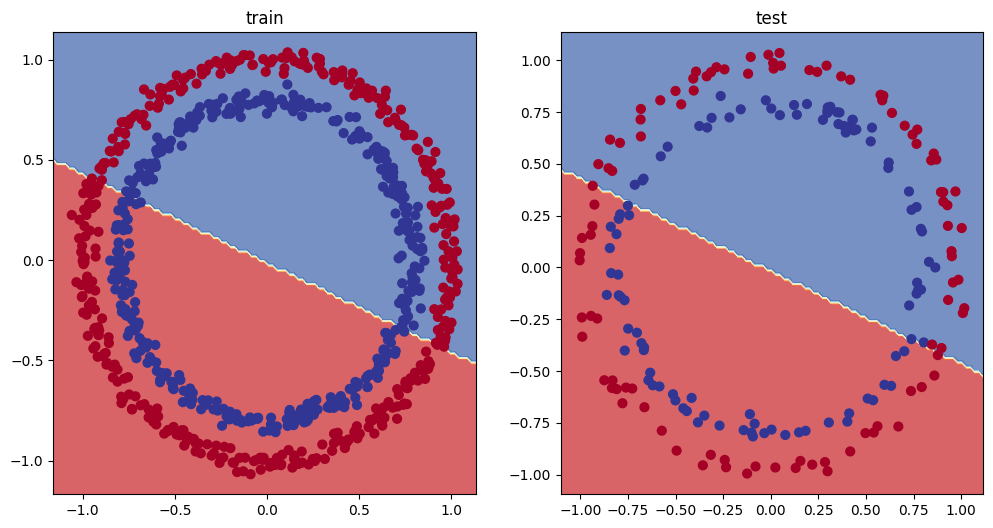

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)